# Adapting Infection Spread Model

### Modeling infection spread using SIR model

In [6]:
import numpy as np

def SIR_model(S0, I0, R0, beta, gamma, days):
    dtype = [('day', int), ('susceptible', float), ('infected', float), ('recovered', float)]
    #Initialize arrays
    data = np.zeros(days, dtype=dtype)
    data['day'] = np.arange(days)
    data['susceptible'][0] = S0
    data['infected'][0] = I0
    data['recovered'][0] = R0
    
    #Total population
    N = S0 + I0 + R0 

    #Calculate values
    for t in range(1, days):
        data['susceptible'][t] = data['susceptible'][t-1] - beta * data['susceptible'][t-1] * data['infected'][t-1] / N
        data['infected'][t] = data['infected'][t-1] + beta * data['susceptible'][t-1] * data['infected'][t-1] / N - gamma * data['infected'][t-1]
        data['recovered'][t] = data['recovered'][t-1] + gamma * data['infected'][t-1]

    return data

# --------------------------
# Main Program
# --------------------------

# Initial values
S0 = 990 #Number of susceptible individuals
I0 = 10 #Number of infected individuals
R0 = 0 #Number of recovered individuals
beta = 0.3 #infection rate
gamma = 0.1 #recovery rate
days = 160 #Number of days to simulate

SIR_data = SIR_model(S0, I0, R0, beta, gamma, days)

# Find peak number of infections
peak_infections = np.max(SIR_data['infected'])
peak_day = np.argmax(SIR_data['infected'])
#print(f"\nPeak Day of infections: {peak_day}")

#print("\nSusceptible:\n", SIR_data['susceptible'])
#print("\nInfected:\n", SIR_data['infected'])
#print("\nRecovered:\n", SIR_data['recovered'])



#### Monte Carlo Simulation

In [7]:
# Monte Carlo simulation to estimate the impact of random initial infected
def monte_carlo_simulation(S0, I0_range, R0, beta, gamma, days, num_simulations):

    final_infected = np.zeros(num_simulations)

    for i in range(num_simulations):
        # Randomize the initial number of infected individuals within the specified range
        I0 = np.random.randint(I0_range[0], I0_range[1])
        
        # Run the SIR model
        SIR_data = SIR_model(S0, I0, R0, beta, gamma, days)
        
        # Store the final number of infected individuals
        final_infected[i] = SIR_data['infected'][-1]
    
    return final_infected

S0 = 990
I0_range = (5, 15)
R0 = 0
beta = 0.3
gamma = 0.1
days = 160
num_simulations = 100

# Run Monte Carlo Simulation
final_infected_results = monte_carlo_simulation(S0, I0_range, R0, beta, gamma, days, num_simulations)
#print("Final infected individuals form each simulation\n: ", final_infected_results)

# Analyze the results
mean_final_infected = np.mean(final_infected_results)
std_final_infected = np.std(final_infected_results)

#print(f"\nMean final number of infected individuals: {mean_final_infected}")
#print(f"\nStandard deviation of final number of infected individuals: {std_final_infected}")

### Line Plots of SIR Model Dynamics

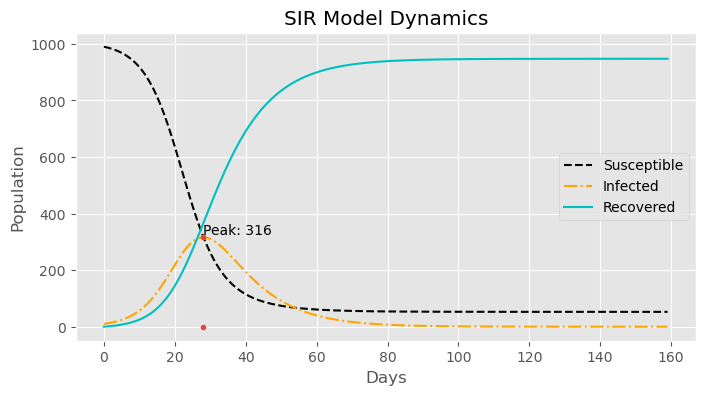

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')


plt.figure(figsize=(8,4))
plt.plot(SIR_data['day'], SIR_data['susceptible'], '--k', label='Susceptible')
plt.plot(SIR_data['day'], SIR_data['infected'], '-.', label='Infected', color='orange')
plt.plot(SIR_data['day'], SIR_data['recovered'], label='Recovered', color='c')
#plt.axvline(peak_day, color='black', linestyle='--')
plt.plot([peak_day, peak_day], [0, peak_infections], '.')
plt.text(peak_day, peak_infections, f'Peak: {peak_infections:.0f}', 
         verticalalignment='bottom', horizontalalignment='left', color='black')
plt.xlabel('Days')
plt.ylabel('Population')
plt.title('SIR Model Dynamics')
plt.legend();


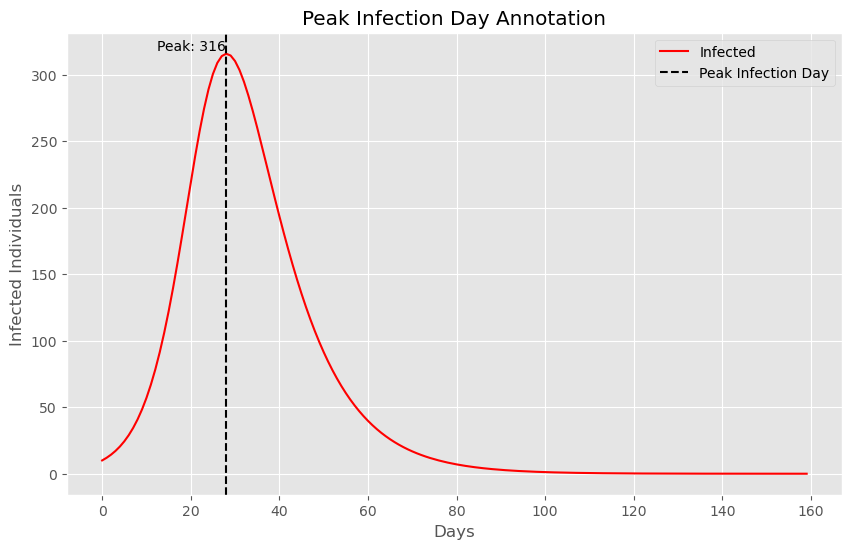

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(SIR_data['day'], SIR_data['infected'], label='Infected', color='red')
plt.axvline(peak_day, color='black', linestyle='--', label='Peak Infection Day')
plt.text(peak_day, peak_infections, f'Peak: {peak_infections:.0f}', 
         verticalalignment='bottom', horizontalalignment='right', color='black')
plt.xlabel('Days')
plt.ylabel('Infected Individuals')
plt.title('Peak Infection Day Annotation')
plt.legend()

### Scatter Plot of Final Infected Individuals from Monte Carlo Simulation

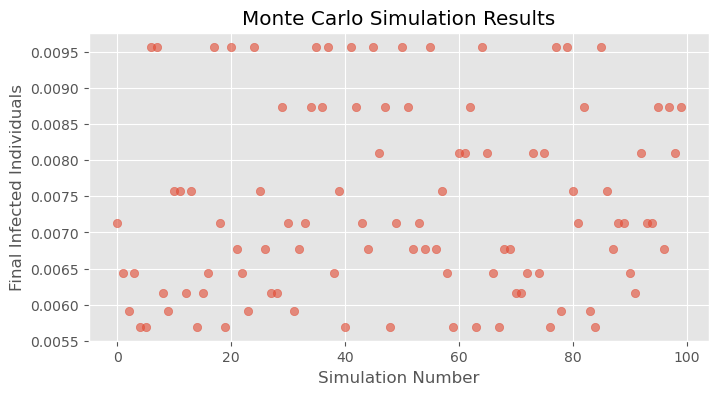

In [10]:
plt.figure(figsize=(8,4))
plt.scatter(range(num_simulations), final_infected_results, alpha=0.6)
plt.xlabel('Simulation Number')
plt.ylabel("Final Infected Individuals")
plt.title('Monte Carlo Simulation Results');

### Histogram of Final Infected Individuals from Monte Carlo Simulation

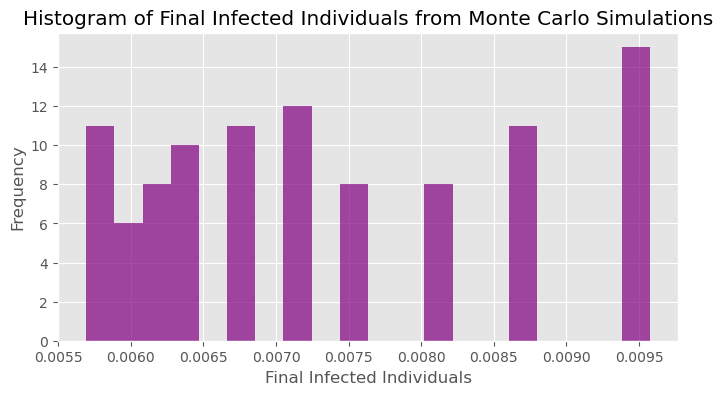

In [11]:
plt.figure(figsize=(8,4))
plt.hist(final_infected_results, bins=20, color='purple', alpha=0.7)
plt.xlabel('Final Infected Individuals')
plt.ylabel('Frequency')
plt.title('Histogram of Final Infected Individuals from Monte Carlo Simulations');

### Density and Contour Plots for SIR Model Parameters

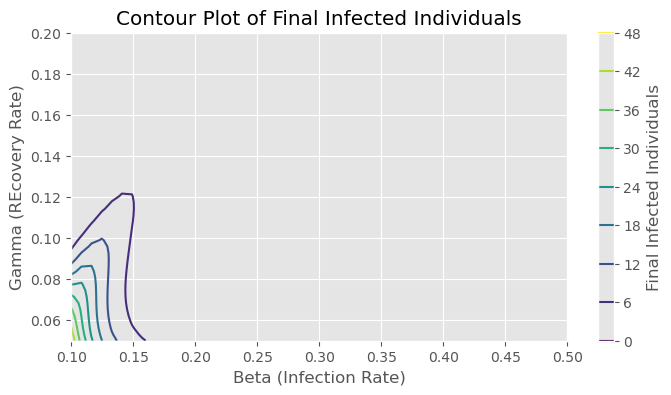

In [12]:
beta_values = np.linspace(0.1, 0.5, 50)
gamma_values = np.linspace(0.05, 0.2, 50)
final_infected = np.zeros((len(beta_values), len(gamma_values)))

for i, beta in enumerate(beta_values):
    for j, gamma in enumerate(gamma_values):
        SIR_data = SIR_model(S0, I0, R0, beta, gamma, days)
        final_infected[i,j] = SIR_data['infected'][-1]
        
plt.figure(figsize=(8,4))
plt.contour(beta_values, gamma_values, final_infected.T, cmap='viridis')
plt.colorbar(label='Final Infected Individuals')
plt.xlabel('Beta (Infection Rate)')
plt.ylabel('Gamma (REcovery Rate)')
plt.title('Contour Plot of Final Infected Individuals');

Text(0.5, 0.92, '3D Plot of Infection and Recovery over Time')

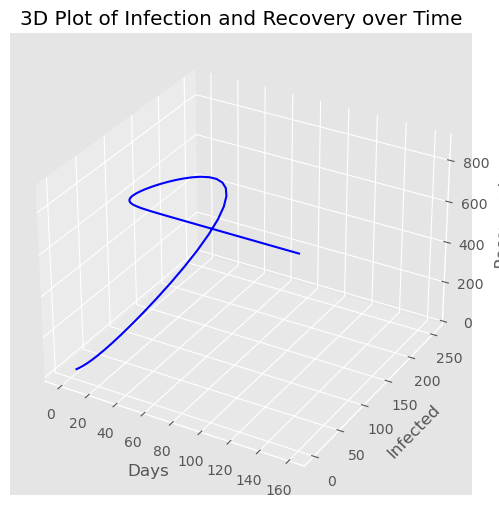

In [13]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot3D(SIR_data['day'], SIR_data['infected'], SIR_data['recovered'], color='blue')
ax.set_xlabel('Days')
ax.set_ylabel('Infected')
ax.set_zlabel('Recovered')
ax.set_title('3D Plot of Infection and Recovery over Time')

In [15]:
from ipywidgets import interact, FloatSlider
# interactive plotting for SIR model
def plot_SIR(beta, gamma):
    S0 = 1000
    I0 = 1
    R0 = 0
    days = 200
    
    SIR_data = SIR_model(S0, I0, R0, beta, gamma, days)
    
    peak_infections = np.max(SIR_data['infected'])
    peak_day = np.argmax(SIR_data['infected'])
    
    plt.figure(figsize=(8,4))
    plt.plot(SIR_data['day'], SIR_data['susceptible'], '--k', label='Susceptible')
    plt.plot(SIR_data['day'], SIR_data['infected'], '-.', label='Infected', color='orange')
    plt.plot(SIR_data['day'], SIR_data['recovered'], label='Recovered', color='c')
    #plt.axvline(peak_day, color='black', linestyle='--')
    plt.plot([peak_day, peak_day], [0, peak_infections], '.')
    plt.text(peak_day, peak_infections, f'Peak Infections: {peak_infections:.0f}', 
            verticalalignment='bottom', horizontalalignment='left', color='black')
    plt.xlabel('Days')
    plt.ylabel('Population')
    plt.title('Interactive SIR Model Dynamics')
    plt.legend();
    
beta_slider = FloatSlider(value=0.3, min=0.0, max=1.0, step=0.01, description='Beta')
gamma_slider = FloatSlider(value=0.1, min=0.0, max=1.0, step=0.01, description='Gamma')

interact(plot_SIR, beta=beta_slider, gamma=gamma_slider);

interactive(children=(FloatSlider(value=0.3, description='Beta', max=1.0, step=0.01), FloatSlider(value=0.1, d…